## Reading the data

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib widget
import seaborn as sns
import numpy as np
import math
import scipy
from scipy import stats
import re
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score

from IPython.display import Image

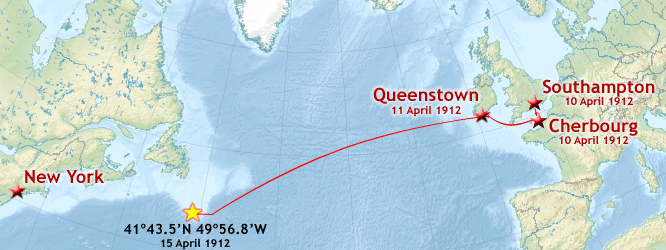

In [2]:
Image('https://upload.wikimedia.org/wikipedia/commons/5/51/Titanic_voyage_map.png')

### Cleaning the Data

#### Removing the age-gaps

Since we need to fill the missing ages that consitute 19% of the training data-set, we'll need to draw out information from the names. I am extracting prefixes from the "Name" column. Mr., Mrs., Master. and Miss. are included in several names. I have grouped these names together in different dataframes. Names not covered in such a list have been classified as 'others'.

In [3]:
def remove_age_gaps(df):

    misters = df[df['Name'].str.contains(' Mr. ')]
    masters = df[(df['Name'].str.contains(' Master. '))]
    miss = df[(df['Name'].str.contains(' Miss. '))]
    misses = df[(df['Name'].str.contains(' Mrs. '))]


    others=df[~df.isin(misters)]
    others=others[others['Name'].notna()]
    others=others[~others.isin(masters)]
    others=others[others['Name'].notna()]
    others=others[~others.isin(misses)]
    others=others[others['Name'].notna()]
    others=others[~others.isin(miss)]
    others=others[others['Name'].notna()]

    misters.reset_index(drop=True,inplace=True)
    masters.reset_index(drop=True,inplace=True)
    miss.reset_index(drop=True,inplace=True)
    misses.reset_index(drop=True,inplace=True)
    others.reset_index(drop=True,inplace=True)
    mean_age_misters = misters['Age'].mean()
    mean_age_masters = masters['Age'].mean()
    mean_age_misses = misses['Age'].mean()
    mean_age_miss = miss['Age'].mean()
    mean_age_others = others['Age'].mean()

    print('Mean age of people with title \'Mr.\' = ' + str(mean_age_misters))
    print('Mean age of people with title \'Master.\' = ' + str(mean_age_masters))
    print('Mean age of people with title \'Mrs.\' = ' + str(mean_age_misses))
    print('Mean age of people with title \'Miss.\' = ' + str(mean_age_miss))
    print('Mean age of people with other titles = ' + str(mean_age_others))
    
    misters['Age'].fillna(misters['Age'].mean(),inplace=True)
    masters['Age'].fillna(masters['Age'].mean(),inplace=True)
    miss['Age'].fillna(miss['Age'].mean(),inplace=True)
    misses['Age'].fillna(misses['Age'].mean(),inplace=True)
    others['Age'].fillna(others['Age'].mean(),inplace=True)
    
    df=pd.concat([misters,masters,miss,misses,others],ignore_index=True)
    return df

#### Removing invalid rows and columns

In [4]:
def remove_invalid_rows_and_columns(df):

    df.drop('PassengerId',axis=1,inplace=True)
    df.drop('Name',axis=1,inplace=True)
    df.drop('Ticket',axis=1,inplace=True)
    df = df[df['Embarked'].notna()]
    return df

#### Cabin
The first letter of the cabin represents the deck.
I am going to number the cabin column as per the extracted label, and later on give process it using one hot encoding.

In [5]:
def cabin_to_deck(df):
    df['Cabin'] = df['Cabin'].fillna("Unknown")
    df['Deck'] = df['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    df.drop(['Cabin'],axis=1,inplace=True)
    return df

In [6]:
def gender_to_numeric(df):
    genders = {"male": 0, "female": 1}
    df['Sex'] = df['Sex'].map(genders)
    return df

## Feature Engineering

<b>Pclass - One hot encoding

In [7]:
def pclass_one_hot(df):
    dummies=pd.get_dummies(df['Pclass'])
    dummies.columns=['Pclass_1','Pclass_2','Pclass_3']
    df = pd.concat([df, dummies], axis=1)
    df.drop('Pclass',axis=1,inplace=True)
    return df

<b>Embarked - One hot encoding

In [8]:
def embarked_one_hot(df):
    dummies=pd.get_dummies(df['Embarked'])
    dummies.columns=['Embarked_C','Embarked_Q','Embarked_S']
    df = pd.concat([df, dummies], axis=1)
    df.drop('Embarked',axis=1,inplace=True)
    return df

<b>Deck - One hot encoding

In [9]:
def remove_T(df):
    df = df[~df.Deck.str.contains("T")]
    return df
def deck_one_hot(df):
    dummies=pd.get_dummies(df['Deck'])
    dummies.columns=['Deck_A','Deck_B','Deck_C','Deck_D','Deck_E','Deck_F','Deck_G','Deck_Unknown']
    df = pd.concat([df, dummies], axis=1)
    df.drop('Deck',axis=1,inplace=True)
    return df

### *Extracting the Target before proceeding*

In [10]:
df=pd.read_csv('train.csv')

In [11]:
def extract_target(df):
    y=df['Survived'].to_numpy()
    df = df.drop('Survived',axis=1)
    return [df,y]

In [12]:
df = remove_age_gaps(df)
print('Age gaps removed')
print(df.shape)
df = remove_invalid_rows_and_columns(df)
print('Invalid rows and columns removed')
print(df.shape)
df = cabin_to_deck(df)
print('Cabin to deck operation performed')
print(df.shape)
df = remove_T(df)
print('Row with T removed')
print(df.shape)
[df,y]=extract_target(df)
print('Target column extracted')
print(df.shape)
df = gender_to_numeric(df)
print('Gender converted to numeric value')
print(df.shape)
df = pclass_one_hot(df)
print('Pclass - One Hot')
print(df.shape)
df = embarked_one_hot(df)
print('Embarked - One Hot')
print(df.shape)
df = deck_one_hot(df)
print('Deck - One Hot')
print(df.shape)

Mean age of people with title 'Mr.' = 32.368090452261306
Mean age of people with title 'Master.' = 4.574166666666667
Mean age of people with title 'Mrs.' = 35.898148148148145
Mean age of people with title 'Miss.' = 21.773972602739725
Mean age of people with other titles = 42.38461538461539
Age gaps removed
(891, 12)
Invalid rows and columns removed
(889, 9)
Cabin to deck operation performed
(889, 9)
Row with T removed
(888, 9)
Target column extracted
(888, 8)
Gender converted to numeric value
(888, 8)
Pclass - One Hot
(888, 10)
Embarked - One Hot
(888, 12)
Deck - One Hot
(888, 19)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


<b>Normalizing the features using Z-score

In [13]:
def normalize(df):
    scaler=preprocessing.MinMaxScaler(feature_range=[0,1])
    X=scaler.fit_transform(df)
    return X

X=normalize(df)
X.shape

(888, 19)

## Train Test Split

In [14]:
np.random.seed(7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=0)

## Linear Regression Model

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.1, solver='liblinear').fit(X_train,y_train)
model = lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
score =accuracy_score(y_test,predictions)
print(score)

0.7528089887640449


## Decision Tree Model

In [16]:
from sklearn.tree import DecisionTreeClassifier
for i in range(2,10):
    dc = DecisionTreeClassifier(criterion="entropy", max_depth = i)
    model = dc.fit(X_train, y_train)
    predictions = dc.predict(X_test)
    score =accuracy_score(y_test,predictions)
    print('Depth = '+str(i)+' Score='+str(score))

Depth = 2 Score=0.7078651685393258
Depth = 3 Score=0.7528089887640449
Depth = 4 Score=0.7415730337078652
Depth = 5 Score=0.7640449438202247
Depth = 6 Score=0.7640449438202247
Depth = 7 Score=0.8426966292134831
Depth = 8 Score=0.8314606741573034
Depth = 9 Score=0.8089887640449438


## K Nearest Neighbours Model

In [17]:
from sklearn.neighbors import KNeighborsClassifier
for k in range (2,20):
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    model = neigh.fit(X_train, y_train)
    predictions = neigh.predict(X_test)
    score =accuracy_score(y_test,predictions)
    print('k = '+str(k)+' Score='+str(score))    

k = 2 Score=0.7865168539325843
k = 3 Score=0.7752808988764045
k = 4 Score=0.7640449438202247
k = 5 Score=0.7528089887640449
k = 6 Score=0.7528089887640449
k = 7 Score=0.7528089887640449
k = 8 Score=0.7303370786516854
k = 9 Score=0.7415730337078652
k = 10 Score=0.7415730337078652
k = 11 Score=0.7303370786516854
k = 12 Score=0.7415730337078652
k = 13 Score=0.7415730337078652
k = 14 Score=0.7303370786516854
k = 15 Score=0.7640449438202247
k = 16 Score=0.7415730337078652
k = 17 Score=0.797752808988764
k = 18 Score=0.7752808988764045
k = 19 Score=0.7865168539325843


In [18]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 
predictions=clf.predict(X_test)
score=accuracy_score(y_test,predictions)
score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7191011235955056

# Evaluating the actual data-set using different algorithms

In [19]:
df1=pd.read_csv('test.csv')
pid = df1['PassengerId'].to_numpy()
df1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [20]:
df1 = remove_age_gaps(df1)
print('Age gaps removed')
print(df1.shape)
df1 = remove_invalid_rows_and_columns(df1)
print('Invalid rows and columns removed')
print(df1.shape)
df1 = cabin_to_deck(df1)
print('Cabin to deck operation performed')
print(df1.shape)
df1 = remove_T(df1)
print('Row with T removed')
print(df1.shape)
df1 = gender_to_numeric(df1)
print('Gender converted to numeric value')
print(df1.shape)
df1 = pclass_one_hot(df1)
print('Pclass - One Hot')
print(df1.shape)
df1 = embarked_one_hot(df1)
print('Embarked - One Hot')
print(df1.shape)
df1 = deck_one_hot(df1)
print('Deck - One Hot')
print(df1.shape)

Mean age of people with title 'Mr.' = 32.0
Mean age of people with title 'Master.' = 7.406470588235294
Mean age of people with title 'Mrs.' = 38.903225806451616
Mean age of people with title 'Miss.' = 21.774843750000002
Mean age of people with other titles = 43.833333333333336
Age gaps removed
(418, 11)
Invalid rows and columns removed
(418, 8)
Cabin to deck operation performed
(418, 8)
Row with T removed
(418, 8)
Gender converted to numeric value
(418, 8)
Pclass - One Hot
(418, 10)
Embarked - One Hot
(418, 12)
Deck - One Hot
(418, 19)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [21]:
X_Unknown = normalize(df1)
X_Unknown.shape

(418, 19)

In [22]:
temp=pd.DataFrame(X_Unknown)
temp[temp.isna().any(axis=1)]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
89,0.0,0.795595,0.0,0.0,NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [23]:
temp.loc[89,4]=0
X_Unknown = temp.to_numpy()

In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.01, solver='liblinear').fit(X,y)
predictions = lr.predict(X_test)
score =accuracy_score(predictions,y_test)
print(score)

0.7191011235955056


In [25]:
from sklearn.tree import DecisionTreeClassifier
for i in range(2,16):
    dc = DecisionTreeClassifier(criterion="entropy", max_depth = i)
    model = dc.fit(X, y)
    predictions = dc.predict(X_test)
    score =accuracy_score(y_test,predictions)
    print('Depth = '+str(i)+' Score='+str(score))
print(len(X_test))
print(len(predictions))

Depth = 2 Score=0.7078651685393258
Depth = 3 Score=0.7752808988764045
Depth = 4 Score=0.797752808988764
Depth = 5 Score=0.8314606741573034
Depth = 6 Score=0.8539325842696629
Depth = 7 Score=0.8651685393258427
Depth = 8 Score=0.9101123595505618
Depth = 9 Score=0.9213483146067416
Depth = 10 Score=0.9325842696629213
Depth = 11 Score=0.9325842696629213
Depth = 12 Score=0.9438202247191011
Depth = 13 Score=0.9550561797752809
Depth = 14 Score=0.9550561797752809
Depth = 15 Score=0.9550561797752809
89
89


In [26]:
from sklearn.neighbors import KNeighborsClassifier
for k in range (2,4):
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X,y)
    predictions = neigh.predict(X_test)
    score =accuracy_score(y_test,predictions)
    print('k = '+str(k)+' Score='+str(score))

k = 2 Score=0.8426966292134831
k = 3 Score=0.8876404494382022


In [27]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X, y) 
predictions=clf.predict(X_test)
score=accuracy_score(y_test,predictions)
score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7191011235955056

In [28]:
yhat_knn=neigh.predict(X_Unknown)
np.savetxt('prediction_knn.csv',yhat_knn,delimiter=',')
yhat_knn

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [29]:
yhat_dec_tree=dc.predict(X_Unknown)
np.savetxt('prediction_dec_tree.csv',yhat_dec_tree,delimiter=',')
yhat_dec_tree

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0.

In [30]:
yhat_lr=lr.predict(X_Unknown)
np.savetxt('prediction_lr.csv',yhat_lr,delimiter=',')
yhat_lr

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [31]:
print(accuracy_score(yhat_knn,yhat_dec_tree))

0.8779904306220095


In [32]:
print(accuracy_score(yhat_knn,yhat_lr))

0.8205741626794258


In [33]:
print(accuracy_score(yhat_dec_tree,yhat_lr))

0.8038277511961722


Using Neural Network to make predictions

In [46]:
import tensorflow
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential

model=Sequential()
model.add(Dense(19, input_dim=19, activation='relu'))
model.add(Dense(1, activation='tanh'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X, y, epochs=150, verbose=2)

Train on 888 samples
Epoch 1/150
888/888 - 0s - loss: 3.1250 - accuracy: 0.6610
Epoch 2/150
888/888 - 0s - loss: 2.4350 - accuracy: 0.6847
Epoch 3/150
888/888 - 0s - loss: 2.3086 - accuracy: 0.7038
Epoch 4/150
888/888 - 0s - loss: 2.0622 - accuracy: 0.7072
Epoch 5/150
888/888 - 0s - loss: 1.5658 - accuracy: 0.7579
Epoch 6/150
888/888 - 0s - loss: 1.5236 - accuracy: 0.7680
Epoch 7/150
888/888 - 0s - loss: 0.7580 - accuracy: 0.7534
Epoch 8/150
888/888 - 0s - loss: 0.5747 - accuracy: 0.7466
Epoch 9/150
888/888 - 0s - loss: 0.5655 - accuracy: 0.7534
Epoch 10/150
888/888 - 0s - loss: 0.5575 - accuracy: 0.7568
Epoch 11/150
888/888 - 0s - loss: 0.5519 - accuracy: 0.7646
Epoch 12/150
888/888 - 0s - loss: 0.5312 - accuracy: 0.7624
Epoch 13/150
888/888 - 0s - loss: 0.5070 - accuracy: 0.7703
Epoch 14/150
888/888 - 0s - loss: 0.4983 - accuracy: 0.7624
Epoch 15/150
888/888 - 0s - loss: 0.4932 - accuracy: 0.7669
Epoch 16/150
888/888 - 0s - loss: 0.4891 - accuracy: 0.7680
Epoch 17/150
888/888 - 0s - 

Epoch 137/150
888/888 - 0s - loss: 0.3930 - accuracy: 0.8412
Epoch 138/150
888/888 - 0s - loss: 0.3901 - accuracy: 0.8345
Epoch 139/150
888/888 - 0s - loss: 0.3926 - accuracy: 0.8423
Epoch 140/150
888/888 - 0s - loss: 0.3911 - accuracy: 0.8401
Epoch 141/150
888/888 - 0s - loss: 0.3919 - accuracy: 0.8423
Epoch 142/150
888/888 - 0s - loss: 0.3893 - accuracy: 0.8412
Epoch 143/150
888/888 - 0s - loss: 0.3902 - accuracy: 0.8390
Epoch 144/150
888/888 - 0s - loss: 0.3879 - accuracy: 0.8390
Epoch 145/150
888/888 - 0s - loss: 0.3877 - accuracy: 0.8378
Epoch 146/150
888/888 - 0s - loss: 0.3887 - accuracy: 0.8401
Epoch 147/150
888/888 - 0s - loss: 0.3889 - accuracy: 0.8401
Epoch 148/150
888/888 - 0s - loss: 0.3879 - accuracy: 0.8401
Epoch 149/150
888/888 - 0s - loss: 0.3869 - accuracy: 0.8390
Epoch 150/150
888/888 - 0s - loss: 0.3868 - accuracy: 0.8401


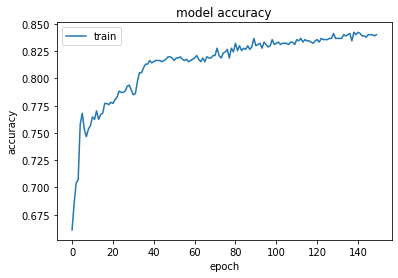

In [47]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

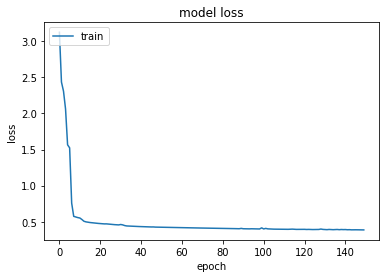

In [48]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### All these models were used to make predictions on the test set on Kaggle website. The average test accuracy was approximately 75%.